# Theoretischer Hintergrund

Zu den beliebtesten und einfachsten Data-Mining-Algorithem zählen neben Naive-Bayes die Entscheidungsbäume. Sie sind genau und können einfach implementiert werden. Entscheidungsbäume erzeugen ein Modell, weches für den Anwender einfach zu interpretieren ist. Sie besitzen  eine eingebaute Dimensionsreduktion und können auch gut hochdimensionale Daten darstellen. [uni-würzburg.de]
Bevor die dem Verfahren zugrunde liegenden Ideen erläutern werden, muss das Klassifikationsproblem erst noch formalisiert werden. Anschließend werden die Verfahren des Entscheidungsbaums erläutert. Im Anschluss wird ein paar Entscheidungsbäume 
Zunächst wird die Theorie der Entscheidungsbäume erläutert. Im Anschluss wird anhand eines Beispiels ein Entscheidungsbäume in R erläutert. Anschließend werden Beispieldatensätze in Python erklärt.


<span style="color:red">Review: Vorletzten Satz das "Im Anschluss wird ein paar Entscheidungsbäume" löschen. <br>
Drei Tippfehler korrigiert.</span>

## Ein Beispiel 


Schauen wir uns das folgende Beispiel an. Dieses enthält fiktive (verdichtete)
Daten, welche eine Problemstellung der Firma behandelt. Die Firma denkt
darüber nach, ihren Umsatz mittels einer Marketingkampagne zu steigern.
Die Firma möchte nur solchen Kunden einen Gutschein für weitere
Bestellungen senden, bei denen zu erwarten ist, dass sie nicht ohnehin
innerhalb von 90 Tagen eine neue Bestellung aufgeben würden (da ja sonst
Geld verloren ginge). Es soll eine Vorhersage zum Gutscheinversand auf
Basis der Kenntnis über den Ablauf vergangener Bestellungen erfolgen,
wobei die Attribute *Verspätung, Kunde, Posten* und *Rücksendung*
betrachtet werden und mittels dieser darauf geschlossen werden soll, ob
eine Neubestellung (innerhalb von 90 Tagen) erfolgen wird (was dann
hieße, dass kein Gutschein zu senden wäre). Die zugehörigen Daten zeigt
die folgende Tabelle. Dabei bedeuten die Werte in der Spalte `Kunde`
**F**rau, **M**ann und **U**nternehmen.

   Fall |  Verspätung |  Kunde  | Posten |  Rücksendung  | ***Neubestellung?***
  :--------:|:--------------: | :---------: |:----------:| :---------------: |:------------------:
      1     |       lang      |      M      |   einzel   |       nein        |        nein
      2     |       lang      |      M      |   einzel   |        ja         |        nein
      3     |      keine      |      M      |   einzel   |       nein        |         ja
      4     |       kurz      |      F      |   einzel   |       nein        |         ja
      5     |       kurz      |      U      |  mehrere   |       nein        |         ja
      6     |       kurz      |      U      |  mehrere   |        ja         |        nein
      7     |      keine      |      U      |  mehrere   |        ja         |         ja
      8     |       lang      |      F      |   einzel   |       nein        |        nein
      9     |       lang      |      U      |  mehrere   |       nein        |         ja
      10    |       kurz      |      F      |  mehrere   |       nein        |         ja
      11    |       lang      |      F      |  mehrere   |        ja         |         ja
      12    |      keine      |      F      |   einzel   |        ja         |         ja
      13    |      keine      |      M      |  mehrere   |       nein        |         ja
      14    |       kurz      |      F      |   einzel   |        ja         |        nein

  : Beispieldaten für Entscheidungen zum Gutscheinversand<span
  data-label="tab:dmgutbsp"></span>

Bei dem Beispiel müssen also nur *binäre* Entscheidungen (Ja/Nein) getroffen
werden. Man kann etwas allgemeiner sagen, dass es darum geht, die Datensätze in zwei
*Klassen* einzuteilen. Mit den obigen Trainingsdaten wollen wir dann
für neue Datensätze Vorhersagen treffen, zu welcher Klasse diese 
gehören.

Manchmal muss man versuchen, Daten aus einem nichtnumerischen Datensatz zu klassifizieren und zu gruppieren. Dazu kann man dann einen Entscheidungsbaum verwenden. Dieser hilft dabei, die Daten richtig zu klassifizieren und ebenso zu gruppieren. Ein Entscheidungsbaum-Algorithmus funktioniert, indem er einen Satz aus ja- und nein-Regeln entwickelt. Man kann diesen für neue Daten folgen, um genau zu ermitteln, wie sie durch das Modell charakterisiert werden. Bei Entscheidungsbäumen muss man vorsichtig sein, weil ein Risiko der Fehlerfortpflanzung besteht, welche auftritt, wenn eine Regel des Modells falsch ist. In dem Ereignis auftretende Fehler der Ereignisse können auf diesen falschen Regeln beruhen und sich dadurch auf alle nachfolgenden Entscheidungen ziehen, die entlang des Zweiges des Baums getroffen werden.[Quelle](https://www.thalia.de/shop/home/rubrikartikel/ID42443078.html?ProvID=11000522)

### Klassifikationsproblem 
Um die Notation für die Formaliserung zu vereinfachen, stellen wir uns
vor, dass sämtliche Attributwerte reelle Zahlen wären, die ggf. aber nur
nominal bzw. ordinal zu interpretieren wären. Dies lässt sich durch
Transformation immer erreichen, etwa indem man für nominale Attribute
den einzelnen Attributwerten *irgendwelche verschiedenen* Zahlenwerte
zuordnet oder indem man ordinalen Attributen Zahlenwerte so zuordnet,
dass die *Ordnung erhalten* bleibt. Damit kann man ohne Beschränkung der
Allgemeinheit annehmen, dass insgesamt $m$ Datensätze
$d_1,d_2,\dots,d_m$ mit jeweils $\mu$ reellwertigen Merkmalen
(bzw. *Attributen*) $A_1,A_2,\dots,A_\mu$ betrachtet werden, d.h.
$$
\mathcal{D} = \{d_1,d_2,\dots,d_m\} \subset \mathbb{R}^\mu
$$ 
stellt die *Datenbasis*
(die Menge der betrachteten Datensätze) dar. Dabei nehme $A_i$ (das
$i$-te Attribut) $m_i$ verschiedene Werte $w_{i,j}\>,\ j=1,2,\dots,m_i$
mit der Häufigkeit $m_{i,j}$ an.

Die Datensätze aus $\mathcal{D}$ sind im Allgemeinen $\kappa$ Klassen
$c^{(k)}\>,\ k=1,\dots,\kappa$ zugeordnet. Hierbei ist
$\kappa\in\mathbb{N},\ \kappa\ge2$. Wie für die Attributwerte kann auch für
die Klassen angenommen werden, dass diese (natürliche) Zahlen sind,
d.h. $c^{(k)}=k-1\>,\
k=1,\dots,\kappa$. Dabei kommt es lediglich auf die Unterscheidbarkeit
an und es ist keine Rangfolge festgelegt (Nominalskala). Im Falle einer
binären Klassifikation wie im Gutscheinproblem ist also $\kappa=2$ und
es gibt die Klassen 0 und 1; eine Darstellung, die auch in der Praxis
häufig anzutreffen ist.

In den im Rahmen einer Klassifikation betrachteten *Trainingsdaten*
$\mathcal{T}$ ist dann jedem Datensatz $d_l$ noch eine (wahre bzw. beobachtete)
Klasse $c_l\in\{0,1,\dots,\kappa-1\}$ zugeordnet, d.h. der $l$-te
Trainingsdatensatz besteht aus Tupeln $(d_l,c_l)$, wobei für die
Klassenzuordnungen $\mathcal{C}$ gilt 
$$
\mathcal{C} = (c_1,c_2,\dots,c_m)\>,\ c_l \in \{0,1,\dots,\kappa-1\}\>,\ l=1,2,\dots,
m$$
so dass sich die Trainingsdaten darstellen lassen als
$$
\mathcal{T} =(\mathcal{D},\mathcal{C}) = \{(d_1,c_1),(d_2,c_2),\dots,(d_m,c_m)\} 
  \subset \mathbb{R}^\mu\times\{0,1,\dots,\kappa-1\}\>.
$$ 
Das Klassifikationsproblem besteht dann darin, eine Funktion
$$\begin{aligned}
 f:\mathbb{R}^\mu&\to\{0,1,\dots,\kappa-1\}\\
 d&\mapsto f(d)=c\end{aligned}$$ 
zu finden, die zu einem Datensatz $d$
die gesuchte Klasse $c$ liefert bzw. vorhersagt. In diesem Zusammenhang
wird $f$ als *Klassifikator* und dessen Anwendung als *Klassifikation*
bezeichnet. Die Bestimmung der Funktion $f$ aus den Trainingsdaten
$\mathcal{T}$ heißt *Klassifikatorentwurf*.


## Entscheidungsbäume
### Was versteht man unter Entscheidungsbäumen?
[Entscheidungsbäume](https://de.wikipedia.org/wiki/Entscheidungsbaum) (engl. decision Trees) sind geordnete, gerichtete Bäume.  Sie dienen der Darstellung von Entscheidungsregeln und veranschaulichen hierarchisch aufeinanderfolgende Entscheidungen. Anhand der Darstellungsform für eine Klassifikationsregel eines Entscheidungsbaums, können derer Objekte in Klassen eingeteilt werden und veranschaulichen hierarchisch aufeinanderfolgende Endscheidungen. Sie werden in zahlreichen Bereichen eingesetzt, in welchen automatisch klassifiziert oder aus Erfahrungswissen formale Regeln hergeleitet oder dargestellt werden, z.B im Data-Mining, im Maschinellen Lernen als Methode zur automatischen Klassifikation von Objekten, in der Stochastik als Wahrscheinlichkeitsbaum zur Veranschaulichung bedingter Wahrscheinlichkeiten oder in der ärztlichen Entscheidungsfindung und in der Notfallmedizin. 


Die Grundlage für den Aufbau eines Entscheidungsbaumes sind Trainingsbeispieldatensätze. Deren Klassenzugehörigkeit ist bekannt. Dem  ID3-Algorithmus (Induction  of  Decision  Trees) wird mit deren Hilfe ein  Klassifikator  mit  einem  diskreten  Wert  hervorgebracht.  Ein  Klassifikator  entscheidet darüber,  welcher  Klasse  ein  neuer  Datensatz  zuzuordnen  ist.  Die  Trainingsbeispieldatensätze  bestehen  aus  mehreren  Attributen. i stellt ein Attribut (Zielattribut) dar.
Das  Zielattribut  ist  die  Größe,  welche  klassifiziert  werden  soll.
Jedes  Blatt  des  Entscheidungsbaumes  wird  anhand des Zielattributes klassifiziert. Es erhält also einen   möglichen   Wert   des   Zielattributes. Bei der Entscheidungsauswahl darf das Zielattribut nicht berücksichtigt 
werden, weil es das Ergebnis dieser Entscheidungen darstellt. Daher taucht es nie selbst als Knoten im Baum auf. 

Die  Entscheidungsbäume  werden  top-down  aufgebaut. Ausgehend  von  der  Wurzel des Baumes werden Unterteilungen anhand der Attributwerte vorgenommen. Die  Verfahren  variieren darin,  nach  welchem  Kriterium  diese  Unterteilung  vorgenommen  wird. Zu den häufig implementierten Baumtypen zählen die sogennante  CARTs (Classification   And   Regression   Trees)   und   CHAIDs   (Chi-Square   Automatic   Interaction Detectors). Der ID3-Algorithmus findet ebenfalls Verwendung.[Quelle](https://www.in.th-nuernberg.de/professors/Holl/Personal/DataMining_Bachelor.pdf) Auf die Verfahren wird im späteren Verlauf der Ausarbeitung näher eingegangen.

<span style="color:red">Review: Ich würde vielleicht Trainingsdatensätze statt Trainingsbeispieldatensätze schreiben, hört sich für mich besser an. </span>

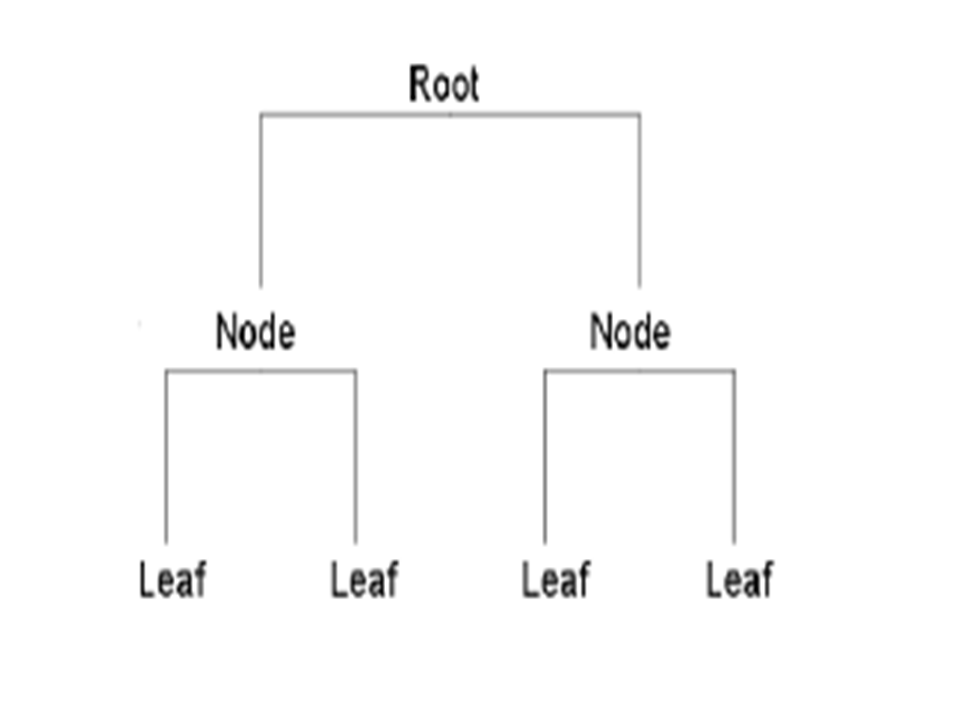

In [3]:
from IPython.display import Image
Image("img/decisiontree.png")

$Abbildung1:$ Die Abbildung stellt einen Entscheidungsbaum in R dar. 

$Root:$ Wurzel,
$Node:$ Knoten,
$Leaf:$ Blätter

Nach dem Theorieteil der Ausarbeitung wird ein Entscheidungsbaum in R dargestellt. Zudem werden Entscheidungsbaum in Python dargestellt. 

### Arten von Entscheidungsbäumen



Entscheidungsbäume sind oft einfacher zu interpretieren. Wenn man einen Baum konstruiert, ist eine der wichtigen Entscheidungen, die man macht, der Algorithmus oder die Methode, welche man für die Splits benutzt.
[Quelle](https://www.lynda.com/Big-Data-tutorials/Decision-trees/420305/505150-4.html)
Der Baum  wird so gestaltet,  dass  in  jedem  Knoten  ein  Attribut  abgefragt  wird und  auch eine  Entscheidung  getroffen  wird,  bis  man  ein  Blatt  erreicht hat, welches von einem Knoten abgeht. An diesem wird  keine  weitere  Verzweigung  durchgeführt.
Die Klassifikation  kann hier abgelesen  werden.  Solche Bäume werden auch Klassifikationsbäume genannt. 


Bei den Entscheidungsbäumen unterscheidet man zwischen $Klassifikationsbäumen$ und $Regressionsbäumen$. Klassifikationsbäume stellen eine Auswahl von diskreten Klassen und ihren Beziehungen untereinander dar(quantitative und kategoriale Daten, um kategoriale Ausgänge zu formen). Regressionsbäume dienen der Prognose und ordnen jedem Wert einen stetigen Wert zu. Eine quantitative Variabel liegt bei Regressionsbäumen als Zielgröße vor (quantitative und kategorial Daten, um quantitative Ausgänge zu formen).
Es wird oft von $geordneten$ und $ungeordneten$ Attributen geredet. Von einem geordneten Attribut wird gesprochen, wenn es kontinuierliche beziehungsweise nummerische Werte besitzt. Ein ungeordnetes Attribut weißt dahingegen diskrete oder kategorische Werte auf. Es gibt auch einige Algorithmen, welche nur mit geordneten oder nur mit ungeordneten Variablen arbeiten können. [Weide, 2012]
Von einem $binärem$ Entscheidungsbaum spricht man, wenn jeder Knotenpunkt höchstens zwei Verzweigungen besitzt, d.h es wird an jeder Wurzelverzweigung eine eindeutige Entscheidung abgefragt. I.d.R sind bei $nicht-binären$ Bäumen die Anzahl der Verzweigungen an einem Knoten mit der Anzahl der verschiedenen Ausprägungen eines Attributs identisch. 
Außerdem lassen sich Entscheidungsbäume in $univariate$, $multivariat-lineare$ und $nicht-linearen$ Entscheidungsbäume unterteilen. Bei univariaten Entscheidungsbäumen wird an jedem Knoten nur ein Attribut getestet. Diese sind eine sehr beliebte Art, welche z.B im Basisalgorythmus ID3 und in der Weiterentwicklung im C4.5 verwendet wird. Bei multivariaten Bäumen wird an jedem Knoten eine Linearkombination aus mehreren Attributen getestet. Unter einem nicht-linear Entscheidungsbaum spricht man, wenn an jedem Knoten nicht-Linearkombination aus mehreren Attributen getestet wird. [Weide, 2012]

### Graphentheorie
Ein Entscheidungsbaum kann zunächst im Sinne der Graphentheorie beschreiben werden. Unter einem $Graph$ versteht man eine Menge von Objekten und die zwischen den Objekten bestehenden Verbindungen. Diese können durch Linien repräsentiert werden. Wenn diese Linien zudem eine Richtung haben, so handelt es sich um einen gerichteten Graphen. Die Linien können durch Pfeile dargestellt werden. 

- $Definition 1:$ Ein (gerichter) Graph ist ein Tupel $\mathcal{G}$ = (V,E) mit einer Menge von Knoten V und einer Menge von (gerichteten) Kanten E ⊆ V x V. 

Gerichtete Kanten sind Tupel (v, v') mit v != v'. v stellt den Anfang der Kante dar und v' das Ende. Wenn der Graph uungerichtet ist, so werden die Kanten als Mengen {v, v'} darstellt. Die Knoten eines Graphen können entlang seiner Kante entlaufen. Dies ist in einem gerichteten Graphen nur in eine Richtung möglich. 


- $Definition 2:$ Sei $\mathcal{G}$ ein Graph. Ein Weg in $\mathcal{G}$ ist eine Folge von Knoten $w=(v_0,v_1,v_2\dots,v_n)$, so dass die Kanten  $ {{v_i, v_i+1}} $ oder $(v_i, v_i+1)$ für alle i in $\mathcal{E}$ enthalten sind, 0 ≤ i ≤ n-1. Die Länge von $\mathcal{w}$ ist n. 


 
- $Definition 3:$ Sei $\mathcal{G}$ ein Graph. Falls alle Knoten eines Weges $\mathcal{w}$ verschieden sind, so wird $\mathcal{w}$ als Pfad andernfalls als Zyklus bezeichnet. Ein Graph ohne Zyklus wird asyklisch benannt. Wenn es zwischen je zwei Kanten in $\mathcal{G}$ (mindestens) einen Pfad gibt, so wird der Graph zusammenhängend genannt.

- $Definition 4:$ Ein Baum $\mathcal{T}$ = ($\mathcal{G}$,r) besteht aus einem Graph $\mathcal{G}$ = (V,E), der azyklisch und zusammenhängend ist und einem Knoten r, so heißt er Wurzel.

- $Definition 5:$ Ein gerichteter Baum $\mathcal{T}$ = (G, r) ist ein gerichteter Graph G = (V, E) mit der Wurzel r. Für ihn gibt es für jeden Knoten v $\mathcal{!=}$ r genau einen Pfad  $\mathcal{w}$= (r,....,v) gibt. 

Damit man einen Entscheidungsbaum definieren kann, wird im Nachfolgenden noch der Begriff des Blattes benötigt. 


- $Definition 6:$ Ein Knoten l eines gerichteten Baumes $\mathcal{T}$ heißt Blatt, wenn keine Kante von ihm wegzeigt. (l, v) /∈ $\mathcal{E}$ für alle v E V

Die untenstehende Abbildung zeigt die oben beschriebenen Definitionen. Der Graph a) besteht aus ungerichtete Kanten, zyklisch und nicht zusammenhängend.
Graph b) besitzt gerichtete Kanten, einen Zyklus in (A, B, C, A) und er ist zusammenhängend.
In Abbildung c) wird ein gerichteter Baum $\mathcal{T}$ = ($\mathcal{G}$,r) mit der Menge an Knoten V = {A,B,C,D,E,F,G,H} und der Menger an gerichteten Kanten E = {(A,B),(A,D),(A,E),(B,C),(B,G),(E,F),(E,H)}. A ist die Wurzel. C, G, D, F und H sind die Blätter. Es lässt sich sagen, dass die Definitionen 4 und 5 äquivalent sind. GRAFIK EINFÜGEN !!



- $Satz 7:$ Sei $\mathcal{T}$ = ($\mathcal{G}$,r) ein Baum mit der Wurzel r. Die nachfolgenden Aussagen sind äquivalent:
1. G ist zusammenhängend und auch azyklisch. 
2. Durch genau einen Pfad sind je zwei Knoten  v, v' element V, v != v'. 
3. Es existiert genau ein Pfad (r,....,v), für jedes v element V, v !=r.


- $Definition8$: Ein Binärbaum ist ein Baum $\mathcal{T}$ = ($\mathcal{G}$,r). Bei ihm hat jeder Knoten maximal zwei direkte Nachfolger.

In einem Binärbaum enthält ein Level Li maximal $( 2^i)$ Knoten. Wenn diese Zahl erreicht wird, bezeichnet man dieses Level als vollständig. Ein Binärbaum mit der Höhe H besitzt maximal $2^(H+1)-1$  Knoten. Mit Hilfe des Gini Index können binäre Entscheidungsbäume erstellt werden.

Die Knoten stehen symbolisch für abzufragende Enscheidungskriterien. Ein Entscheidungskriterium kann entweder ein Attribut oder eine Kombination von Attributen sein. Beispiel anhand des Aussehens einer Hand. Die Kanten eines Entscheidungsbaumes zeigen die Alternativen auf, welche zu einem Kriterium gehören, d.h Mengen von Attributswerten, wie normal, leicht angeschwollen oder stark angeschwollen. Die Blätter eines Entscheidungsbaums stehen für die Entscheidungsergebnisse. Der Patient hat eine geschwollene Hand.
Wenn man nach der Erstellung von einem Entscheidungsbaum eine Instanz $X_i$ klassifiziert, fängt man bei der Wurzel an und testet dann die Instanz nach dem ersten Kriterium $A_i$, zum Beispiel x_ij < 1, xij = 1 oder xij < 1. Abhängig vom Ergebnis wird sie dann an einem der Nachfolger von r weitergegeben. Da wird sie dann auf einem Entscheidungskriterium untersucht und weitergegeben. Dieser Vorgang wird so lange durchgeführt, bis die Instanz in einem Blatt angekommen ist. Dort enthält sie ein Klassenlabel yi. Dieser Weg, welchen die Instanz bis hier genommen hat, ist wie oben definiert ein Pfad.[Quelle](http://www.uni-wuerzburg.de/fileadmin/10030600/Mitarbeiter/Schwemmlein_Lena/20111207_Diplomarbeit_Lena_Schwemmlein_Data_Mining.pdf)

### Eigenschaften/Struktur Zusammenfassung
![decisiontree.png](attachment:decisiontree.png)
Ein Entscheidungsbaum besitzt folgende Eigenschaften.
Ein Blatt $L_i$ repräsentiert einer der Klassen $C_i$ .
Ein innerer Knoten repräsetiert ein Attribut.
Eine Kante repräsentiert einen Test aus dem Attribut des Vaterknotens. 
Wenn man davon ausgeht, dass man nur zwei Klassen hat, so repräsentiert der Entscheidungsbaum eine boolische Funktion.[Quelle](www.inf.fh.rhein-sieg.de/)
Die Konstruktion eines Entscheidungsbaums erfolgt anhand der Trainingsmenge. Die Anwendung eines Entscheidungsbaums erfolgt beim Durchlauf des Entscheidungsbaums von der Wurzel zu einem der Blätter --> eindeutiger Pfad. Zuordnung des Objektes zur Klasse des erreichten Blatts. [Quelle](www.dbs.ifi.lmu.de)



### Basis-Algorithmus
Am Anfang gehören alle Trainingsdatensätze zur Wurzel. Dann wird das nächste Attribut ausgewählt (Splitstrategie). Unter Nutzung des Splitattributs werden die Trainingsdatensätze partitioniert. Für die Partitionen wird das Verfahren rekursiv fortgestzt. --> lokal optimierter Algorithmus (Quelle)[www.dbs.ifi.lmu.de]
### Abbruchbedingungen
Es gibt keine weiteren Splitattribute. Alle Trainingsdatensätze eines Knotens gehören zur selben Klasse. (Quelle)[www.dbs.ifi.lmu.de]

## Fehlerrate
Unter der Fehlerrate eines Entscheidungsbaums versteht man die Anzahl der inkorrekt klassifizierten Datenobjekte in dem Verhältnis zu allen Datenobjekten eines Datensatzes. Die Zahl wird auf den verwendeten Trainingsdaten disjunkten Mengen an klassifizierten Datenobjekten ermittelt.

## Splitstrategien
Da die Entscheidungsbäume zu den überwachten Methoden gezählt werden, existiert eine Zielvariable Yi. Es kommt bei der Induktion von Entscheidungsbäumen i.d.R ein gieriger Algorithmus zum Einsatz. Es handelt sich dabei um Algorithmen wie das Gradientenverfahren. Diese wählen schrittweise den Folgezustand aus. Dieser entspricht zu derzeitigen Zeitpunkt den größten Gewinn. Meistens finden geriege Algorithmen nicht die optimale Lösung, aber sie arbeiten dafür schnell. Zu den Hauptaufgaben von Entscheidungsbäumen werden die Auswahl eines geeigneten Attributs als Entscheidungskriteriums und die Endgröße des Baumes gezählt.




### Informationsgewinn (information gain)
Der Informationsgewinn basiert aus der Informationstheorie. Diese beschäftigt sich mit dem Wert oder Informationsgehalt von Nachrichten. Das Ziel ist es, im Knoten v das Attribut zu finden. Mit dessen Hilfe erhält man bei einer Teillung den maximalen Infomationsgewinn.

$Definition:$ Die Entropie oder Information einer Menge v wird folgendermaßen definiert:
$$
\begin{gather}
Info(v):= -\sum_{k=1}^k  pk * log_2 \tag{2} (pk)\\
\end{gather}
$$

pk stellt die Wahrscheineinlichkeit dar, und zwar dass eine beliebige Instanz $X_i$ der Klasse $c_k$ angehört. und kann durch $|k_v|$/$|v|$ mit: 


$$
\begin{gather}
|k_v|:= \sum_{k=1}^n I(X_i ∈ v \wedge X_i ∈ C_k) 
\end{gather}
$$

aus den Daten geschätzt werden. Es wird die logarithmische Funktion zur Basis 2 benutzt, aus dem Grund, da Information in bits kodiert. Wir nehmen an, dass man die Instanzen in $\mathcal{v}$ mit Hilfe von einem diskret wertigen Attributs $A_j = { a_i, a_2,\dots, a_w} $ aufteilen. Maximal können $\mathcal{w}$ disjunkte Untermengen von $\mathcal{v}$ gebildet werden, $\mathcal{v_z} := { X_i element \mathcal{v} | x_ij =a_z }, z = 1, \dots, \mathcal{w}$. Sie entsprechen den direkten Nachfolgern von $\mathcal{v}$. 

$Definition:$ Sei $\mathcal{v}$  eine Menge von Instanzen, und Info$\mathcal{v}$ sei die zugehörige Information und $A_i$ ein Attribut. So ist dann die bedingte Entropie des Attributs $A_j$ folgendermaßen definiert:
$$
\begin{gather}
Info_Aj(\mathcal{v}) := \sum_{z=1}^w \frac{|v_z|}{|v|} * Info( \mathcal{v_z})
\end{gather}
$$
Folgender Term |$\mathcal{v_z}$| / |$\mathcal{v}$| agiert als das Gewicht der z-ten Teilmenge und zwar nach Aufteilung auf dem Attribut $A_j$. Umso kleiner die bedingte Entrophie des Attributs $A_j$, desto größer die Reinheit der Teilmenge.

$Definition:$ Wenn die Information und die bedingte Entropie eines Attributs $A_j$ auf der Menge $\mathcal{v}$
gegeben sind, so ist dann der Informationsgewinn als die Differenz zwischen der Entropie des Elternknotens festgelegt und der bedingten Entropie der Kindknoten: 
$$
\begin{gather}
Gain (A_j):= Info(\mathcal{v}) - Info_Aj( \mathcal{v})
\end{gather}
$$
Als Teilungsattribut im Knoten $\mathcal{v}$ wird das Attribut Aj mit dem höchsten Informationsgewinn gewählt. Es gilt hierbei arg $max_j$ Gain(Aj) = arg $min_j$ $Info_Aj(\mathcal{v}$). In dem Fall, wenn das Attribut Aj stetig ist, dann können anstatt der Teilungspunkte betrachtet werden. Man erhält mit einer festen Zahl $\mathcal{w}$ Teilmengen der Form

$$
\begin{gather}
\mathcal{v_z} := {{X_i ∈ \mathcal{v} | P_z-1 < x_ij ≤ P_z}}, \mathcal{z} =1,\dots , \mathcal{w}.
\end{gather}
$$

### Gewinnquotiont <span style="color:red">=Gewinnquotient?</span>
Der Informationsgewinn bevorzugt Attribute mit einer großen Wertmenge. Daher wurde als Erweiterung der Gewinnquotient (gain ratio) eingeführt. Hierzu wird eine Art Normalisierung in Form von einer Teilungsinformation (split information) auf den Informationsgewinn angewandt. Sie ist empfindlich, wie breit und uniform das Attribut die Trainingsdaten teilt.

$Definition:$ Die Teilungsmenge einer Menge ist die potentielle Information, welche durch die Teilung einer Menge $\mathcal{v}$ in $\mathcal{w}$ disjunkte Teilmengen erzeugt wird.

$$
\begin{gather}
SplitInfo _Aj \mathcal{v} := - \sum_{z=i}^w \frac{1}{|v_z| \ |v|} * log_2 (\|v_z| \ |v|})\\.
\end{gather}
$$

$Definition:$ Der Gewinnquotient ist folgendermaßen definiert:

$GainRatio(A_j)$:= $Gain(A_j$) \ $SplitInfo A_j$( $\mathcal{v}$)
Als Teilungsattribut wird das Attribut mit dem maximalen Gewinnquotient ausgewählt. Der Quotient wird instabil, wenn die Teilungsinformation sehr klein wird. Das kann verhindert werden, wenn man für das ausgewählte Attribut

\begin{gather}
Gain(A_j):= max Gain(A_j'), j' = 1, \dots, m
\end{gather}

fordert. Der Gewinnquotient bevorzugt Teilmengen, bei denen die entstehenden Nachfolgknoten eine sehr unterschiedliche Größe haben. Der Gewinn-Quotient kommt in dem Entscheidungsbumverfahren C4.5 zum Einsatz.



### Gini-Index

Der Gini-Index ist ein weiteres Kriterium zur Teilung von Mengen $\mathcal{v}$. Er ermöglicht im Gegensatz zu den bisherigen Kriterien nur binäre Teilmengen.

$Definition:$ Der Gini-Index misst die Urenheit einer Menge $\mathcal{v}$ als

$$
\begin{gather}
Gini(\mathcal{v}):= 1 -\sum_{k=1}^k  p^2_k \\
\end{gather}
$$

$\mathcal{p_k}$: stellt hier auch wieder die Wahrscheinlichkeit dar, welches eine Instanz aus $\mathcal{v}$ der Klasse $\mathcal{C_k}$ angehört. Es kann durch |k_v|/|v| aus den Daten geschätzt werden. Es sei ein diskret-wertiges Attribut $\mathcal{A_J}$ = {$ a_1, a_2, \dots, a_w $} gegeben. Damit man die beste Binärteilung auf $\mathcal{A_j}$ findet, untersucht man alle 2^w möglichen Teilmengen $\mathcal{T_Aj}$ ⊆  $\mathcal{A_j}$. Je zwei mögliche disjunkte Nachfolger von $\mathcal{v}$ sind definiert als $\mathcal{v_1}:=$ {$X_i$  ∈ $\mathcal{v}$ | $x_ij ∉ T_Aj$} und $\mathcal{v_2}$:= {$X_i$ ∈ $\mathcal{v}$|$x_ij ∉ T_Aj$}. Wenn das Attribut stetig ist, untersucht man analog zum Informationsgewinn alle möglichen Teilungspunkte $\mathcal{P}$. Die Untermengen sind in dem Fall definiert als  $\mathcal{v_1}$:= {$X_i$ ∈ $\mathcal{v}$|$x_ij ≤ $\mathcal{P}$ und  $\mathcal{v_2}$:= {$X_i$ ∈ $\mathcal{v}$|$x_ij > $\mathcal{P}$}




## Pruning
Von Entscheidungsbäumen ist der größte Vorteil <span style="color:red">(Hier würde ich schreiben: "Der größte Vorteil von Entscheidungsbäumen ist..."</span> in der Wissenspräsentation. Es kann zu Problemen kommen, wenn sie wegen ihrer großen Datenmengen und vieler Entscheidungskriterien unübersichtlich werden. Um diese Probleme zu beheben, wurden Algorithmen entwickelt. Diese verhindern, dass Entscheidungsbäume zu stark anwachsen und damit ihre Verständlichkeit verlieren. Die Algorithmen arbeiten mit sogenannten Pruning-Verfahren.

Zu den Teilungskriterien muss man noch ein weiteres Problem betrachten. Wenn man den Baum bis zur vollständigen korrekten Klassifikation wachsen lässt, dann ist das Modell wahrscheinlich zu gut an die Trainingsdaten und an ihre jeweilige Verzerrung angepasst. Man kann mit neuen Daten weniger umgehen. Um dieses Problem zu verhindern, kann man den Baum zurückschneiden. Dies wird auch Pruning genannt. Der Baum wird dann entweder nicht vollständig oder wieder verkleinert. Einige Entscheidungsknoten, welche nur einen kleinen Anteil an der Klassifikationsgüte haben, werden entfernt. Das Pruining löst das Problem des Overfittings aus. Der Entscheidungsbaum würde dadurch seine Generalisierung für die Anwendung verlieren. Man unterscheidet zwischen Prepruning und Postpruning. Bei dem Prepruning wird die weitere Teilung von Knoten durch Haltekriterien verhindert. Wenn der Wert des Teilungskriteriums eine zuvor festgelegte Schranke unterschreitet, dann endet der Teilungsalgorithmus an dieser Stelle. Der betroffene Knoten wird dann zum Blatt. Die Wahl eines Grenzwertes ist problematisch, weil ein zu hoher Wert einen stark vereinfachten Baum entstehen lassen kann. Ein zu geringer Wert trägt hingegen zu wenig zu einer Vereinfachung bei.

## Attribut-Auswahlverfahren 


#### ID3



Der [ID3-Algorithmus](http://www.optiv.de/Methoden/KlassMet/index.htm?16) 
(Interative Dichotomiser 3) ist eines der beliebtesen Designs der Entscheidungsbäume und wurde von Ross Quinlan entwickelt. ID3 ist ein rekursiver Top-Down-Algorithmus, der zur Konstruktion von Entscheidungsbäumen eingesetzt wird. Die hohe Sensibilität für fehlerhafte und widersprüchliche Daten, ist das größte Problem des Algorithmus. Dies hat Fehlklassifikationen zur Folge.
[ID3](https://www2.informatik.hu-berlin.de/~brueckne/ebl.pdf) sucht zuerst für die Wurzel die wichtigste Eigenschaft, die mit dem höchsten Information Gain. Dies stellt den Zuwachs des Informationsgehaltes dar, welches das jeweilige Entscheidungsproblem beinhaltet. So erstellt ID3 weitere Knoten des Baums. Das Verfahren ist bekannt unter Greedy Search (gierige Suche). Von der Wurzel bis zu den Blättern wird ein Entscheidungsbaum gezeichnet. Das Verfahren wird top-down genannt. Würde man von den Blättern zur Wurzel gehen, würde man vom gegensätzlichen Verfahren, dem buttom-up, sprechen. In diesem Algorithmus ist Backtracking nicht vorgesehen. Wenn ID3 einen neuen Knoten im Baum bestimmt,  so ist die Entschiedung unumkehrbar.





#### C4.5 
C4.5 wurde als Erweiterung des ID3-Algorithmus entwickelt und ist der beliebteste Entscheidungsbaum-Algorithmus neben Chart. C4.5 wird verwendet, um aus Trainingsdaten einen Entscheidungsbaum zu erzeugen, mit welchem Datensätze klassifiziert werden können. Dieser wird zur Extrahtion von Regeln aus dem Entscheidungsbaum verwendet. Dieses erstellt nach dem Top-Down-Prinzip rekursiv einen Entscheidungsbaum. Es wird allgemein mit dem gesamten Datensatz $\mathcal{D}$ begonnen und dieser wird dann immer weiter nach folgenden Schema ablaufen:


Dieser [Algorithmus](https://de.wikipedia.org/wiki/C4.5) verhält sich ähnlich wie der Cart-Algorithmus, welcher im nachfolgenden Abschnitt erläutert wird. Bei C4.5 muss keine binäre Aufteilung erfolgen, sondern es kann eine beliebige Anzahl von Verzweigungen eingebaut werden und der Baum wird breiter. Meist ist er weniger tief als der korrespondierende CART-Baum, welcher im Nachfolgenden erläuert wird.
Ein weiterer Unterschied zeigt sich beim sogenannten Pruning, das Stutzen des Baumes. CART erzeugt einige Subtrees und testet diese mit neuen Daten, welche vorher noch nicht klassifiziert wurden. C4.5  beschneidet den Baum ohne Beachtung der gegebenen Datenbasis.
Aus Trainingsdaten generiert C4.5 einen Entscheidungsbaum. Mit diesem können zukünftige Instanzen, welche nicht in den Trainingsdaten enthalten sind, klassifiziert werden. Es wird wie bei dem ID3 Algorithmus, die Berechnung der Entrophie verwendet. Dies wird durchgeführt, um die Reihenfolge der Entscheidungsknoten in deren Abstand zum Wurzelknoten innerhalb des zu generierbaren Entscheidungsbaums bestimmen zu können.





#### CART
[CART](https://de.wikipedia.org/wiki/CART_(Algorithmus) ist ein weiteres Entscheidungsbaum-Verfahren. Der Algorithmus wurde 1984 von Leo Breiman et al. publiziert. Hierbei handelt es sich um einen binären, rekursiven Partitionsalgorithmus. Er kann mit stetigen Attributen und mit Zielvariablen umgehen. Ohne Prepurning wird der Entscheidungsbaum entwickelt. Anschließend wird er mit Hilfe des Kosten-Komplexitäts-Kriteriums zurückgeschnitten. 

Es können nur Binärbäume erzeugt werden. An jeder Verzweigung können immer nur genau zwei Äste vorkommen. Das Finden der optimalen binären Trennung ist das Hauptelement dieses Algorithmus.

Die Attributsauswahl wird durch die Maximierung des Informationsgehaltes gesteuert. Die Daten in Bezug auf die Klassifikation trennen sich optimal. Dies wird mit einem Schwellwert erreicht, welcher zu jedem Attribut gesucht wird. Der Informationsgehalt eines Attributs wird als hoch angesehen, wenn durch die Auswertung der sich aus der Teilung über die Schwellwerte ergebenden Attributausprägungen mit einer hohen Trefferquote eine Klassifikation vorgenommen werden kann.  Bei Entscheidungsbäumen, berechnet aus dem Cart-Algorithmus, gilt je höher der Informationsgehalt eines Attributs in Bezug auf die Zielgröße ist, desto weiter oben im Baum befindet sich dieses Attribut. Durch die Optimierung der Spaltenentrophie ergeben sich jeweils die Entscheidungsschwellwerte. Durch ein gewichtetes Mittel aus den Splatenentropien ergeben sich die Gesamtentropien.

 


## Entscheidungsbaum und Regeln
Sie repräsentieren Regeln in kompakter Form. Jeder Pfad von der Wurzel zu einem Blattknoten entspricht einer logischen Formel in der Form von einer If-then-Regel.

Beispiel:



ID |  Alter |  Autotyp |  Risikoklasse | 
  :--------:|:--------------: | :---------: |:----------:| 
      1     |       20     |      Familienwagen      |   hoch   |                    
      2     |       19    |      Sportwagen     |   hoch  |                         
      3     |      42     |      Sportwagen     |   hoch   |                       
      4     |       60     |      Familienwagen      |   niedrig   |                        
      5     |       30    |      LKW    |  niedrig   |                        
                   
      
 if Autotyp = LKW then Risikoklasse = niedrig 
 
 if Autotyp != LKW and Alter > 50 then Risikoklasse = niedrig,
 
 if Autotyp != LKW and Alter <= 50 then Risikoklasse = hoch.



<span style="color:red">Review: In der ganzen oberen Zelle nur ein paar Tippfehler und Kommas gesetzt.</span>

# Anwendung

## Entscheidungsbaum mit R
Wir wechseln nun in das Notebook:

- '2017-11-24_RK_Entscheisungsbäume_R' 

und schauen uns das Beispiel eines Entscheidungsbaums in R an. Hier wird der in R vorhandene Datensatz 'Kyphosis' verwendet.





## Entscheidungsbäume in Python
Für unsere Textklassifikation verwenden wir das Paket [scikit-learn](http://scikit-learn.org/). Dieses Paket stellt zahlreiche Verfahren des [maschinellen Lernens](https://de.wikipedia.org/wiki/Maschinelles_Lernen) zur Verfügung.


### Beispiel 1:
[Datensatz: Balance-Scale](https://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/)
#### 'Decision Tree classifier 'Implementation in Python mit sklearn Library
Zunächst importieren wir die benötigten Bibliotheken. Wir importieren 'numpy', sklearn 'train_test_split', 'DecisionTreeClassifier' und 'accuracy_score' modules.
- Numpy arrays und Pandas Dataframes helfen uns die Daten zu manipulieren. 
- Die Methode Train_test_split() teilt uns den Datensatz in einen Taining- und in einen Testsatz. 
- Das 'tree' Module wird benötigt, um den Decision Tree Clasifier anzuwenden.
- Accuacy_score Module wird benötigt, um die Genauigkeit von der vorhersagenden Klassenvariablen zu berechnen.


In [3]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

D:\Programme\ana\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Daten importieren
Wir lesen unseren Datensatz 'Balance-Scale' als csv Datei ein. Dazu benutzen Pandas read_csv() Methode, um die Daten in Pandas Dataframe zu importieren.
Da unsere Daten in der csv-Datei per Komma ',' getrennt sind, ist keine Kopfzeile (header) in unseren Daten vorhanden. Daher setzten wir den Kopfzeilen Parameter Wert auf 'None' und sep Parameter Wert auf ','. Unsere Daten werden in dem Dataframe 'bance_data' gespeichert.


In [4]:
balance_data = pd.read_csv("data/Balance-Scale.csv", sep= ',', header= None)

Um die Länge und die Dimensionen unseres Dataframes zu überprüfen, verwenden wir die len() Methode und '.shape'

In [5]:
print("Dataset Lenght"), len(balance_data)
print("Dataset Shape"), balance_data.shape

Dataset Lenght
Dataset Shape


(None, (625, 5))

Mit der Methode Head() geben wir nun die ersten 5 Zeilen aus.

In [19]:
print("Dataset")
balance_data.head()

Dataset


,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


#### Datenaufteilung

Daten splicing ist ein Schritt um Daten in einen Trainings- und einen Testsatz einzuteilen. Der Trainingsdatensatz kann benutzt werden, um unser Model zu konstruieren. Während der Standardisierung, sollten wir unseren Test nicht standardisieren. <span style="color:red"><--Den Satz check ich nicht:D</span>
Der Datensatz teilt die Daten in feature set & target set. Der 'X' Satz besteht aus  Einflussvariablen. Er besteht aus Daten aus der zweiten Spalte. Wir benutzen '.values' von numpy, in dem wir unsere Dataframes in numpy arrays konvertieren.

In [20]:
X = balance_data.values[:, 1:5]
Y = balance_data.values[:,0]

Wir splitten unsere Daten in einen Trainings- und einen Testsatz und benutzten hierfür die Methode  train_test_split(). X_train, Y_train sind Trainingssätze und X_test, X_test sind Testsätzte.
Der Parameter Test_size erhält einen Wert von 0.3. Das bedeutet, dass der Testsatz 30% des kompletten Datensatzes enthält. Der Trainingsdatensatz hat eine Größe von 70% des kompletten Datensatzes. Die random_state Variable ist eine pseudozufällige Nummer (gegerator state), welche für zufällige Stichproben verwendet wird. 

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

#### Klassifikationsbaum Training

Wir verwenden nun den 'DecisoinTree' Algorithmus an unserem Trainingsdatensatz an, prognostizierende Label für den validierenden Datensatz und die Geanuigkeit des Models, indem man verschiedene Parameter benutzt.

<span style="color:red">Der obere Satz soll wohl heißen:" Wir wenden nun den "DecisionTree" Algorithmus an unserem Trainingsdatensatz an und prognostizieren Labels für den validierenden Datensatz und die Genauigkeit des Modells, indem wir verschiendene Parameter benutzen.</span>

- $DecisionTreeClassifier():$ Das ist die Klassifikatorfunktion für DecisionTrees. Es ist die Hauptfunktion für diesen Agorithmus. Im Folgenden werden ein paar wichtige Parameter aufgelistet:

- $criterion:$ Diese definiert die Funktion um die Qualität einer Aufteilung zu ermitteln. Sklearn unterstützt die gini' Kriterien für den Gini-Index und die Entropy für den Informationsgewinn. Bei 'Default', wird der Gini-Wert genommen.

    
- $splitter:$ definiert die Strategie, um die Spaltung an jedem Knoten zuwählen. $'best'$, wird verwendet um die beste Aufteilung zu wählen . $'Random'$ wird verwendet, um die beste zufällige Aufteilung zuwählen.  Bei $Default$ wird der 'best' Wert verwendet.


- $max_features:$ Definiert die Nummer der Eigenschaften, wenn man die beste Aufteilung anschaut. Wir können integer, float, string, und 'None' Wert verwenden.

        If an integer is inputted then it considers that value as max features at each split.
        If float value is taken then it shows the percentage of features at each split.
        If “auto” or “sqrt” is taken then max_features=sqrt(n_features).
        If “log2” is taken then max_features= log2(n_features).
        If None, then max_features=n_features. By default, it takes “None” value.
        
- $max_depth:$ Definiert die maximale Tiefe des Baumes. Es können jegliche integer Werte oder 'None' verwendet werden. Wenn 'None' verwendet wird, dann sind die Knoten erweitert bid alle Blätter unverfälscht sind oder alle Blätter weniger als Min_samples_split Stichprobe enthalten. Bei 'Default', wird enthält 'None' value.


- $min_samples_split:$ Die minimalste Anzahl der benötigten Stichproben, um den internen Knoten aufzuspalten. Wenn ein 'integer' Wert verwendet wird, dann überlegt man min_samples_split als minimalste Anzahl zu nehmen. Wenn 'float' verwendet wird, dann wird der Prozentsatz gezeigt.


- $min_samples_leaf:$ Die minimale Anzahl der benötigten Stichproben an einem Blattknoten. Falls ein 'integer' Wert verwendet wird, dann erwägt man min_samples_leaf als minimalste Anzahl zu verwenden. Wenn 'float' verwendet wurde, wird der Prozentsatz gezeigt. Bei 'Default', wird der Wert '1' genommen.


- $max_leaf_nodes:$ Definiert die maximale Anzahl der möglichen Blattknoten. Wenn 'None', dann wird eine unbegrenzte Anzahl an Blattknoten verwendet. Bei 'Default', wird der 'None' Wert verwendet.


- $min_impurity_split:$ Definiert die Grenze für das frühzeitige Stoppen des Baumwachstums. Ein Knoten wird geteilt, wenn seine Unreinheit über der Grenze ist, andernfalls ist es ein Baltt.



<span style="color:red">Nur ein paar Tippfehler korrigiert</span>

Wir benutzen 'criterion' als Gini-Index und Informationsgewinn. Wir müssen unseren Klassifikator anpassen, indem wir fit() benutzen. 

In [22]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

#### 'Decision Tree Classifier' mit  dem Kriterium Informationsgewinn

In [23]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

#### Prediction

Wir haben jetzt zwei Klassifikatoren geformt. Ein Klassifikator mit dem Gini-Index und den anderen mit dem Informaionsgewinn als Kriterium. Wir können nun voaussagen der Klassen für unseren Testsatz. (<span style="color:red">= Wir können nun Voraussagen für unseren Datensatz treffen)</span> Dazu benutzen wir die Methode prectict(). (<span style="color:red">=predict()</span>)

In [24]:
clf_gini.predict([[4, 4, 3, 3]])

array(['R'], dtype=object)

#### Prediction für 'Decision Tree classifier' mit dem Kriterim  Gini-index

In [25]:
y_pred = clf_gini.predict(X_test)
y_pred

array(['R', 'L', 'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'L',
       'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L',
       'L', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'L',
       'L', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R',
       'L', 'R', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'L', 'L',
       'L', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R',
       'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R',
       'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L',
       'R', 'L', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'R', 'R', 'R',
       'L', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'R', 'R', 'R', 'R', 'L',
       'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L

#### Prediction für 'Decision Tree classifier' mit dem Kriterium Informationsgewinn

In [26]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array(['R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'R', 'R', 'R', 'R', 'L',
       'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L',
       'R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'R',
       'L', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'L', 'R',
       'L', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R',
       'L', 'L', 'R', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R',
       'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'L', 'R',
       'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R',
       'L', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L',
       'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R', 'R', 'R', 'R',
       'L', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L',
       'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'R', 'R

####  Accuracy Score
Die Funktion 'accuracy_score()' wird benutzt um die Genauigkeit des DecisionTree Algorithmus auszugeben. Mit der Genauigkeit (accuracy), wird das Verhältnis zwischen den richtig vorausberechneten Datenpunkten zu allen vorausberechnten Datenpunkten (<span style="color:red">angegeben</span>). 'Accuracy' ist eine Metrik, um die Effektivität des Algorithmus zu verstehen. Man unterscheidet zwischen vier Parameter:

    y_true,
    y_pred,
    normalize,
    sample_weight.


    

Zudem sind normalize & sample_weight optionale Parameter. Der Parameter y_true akzeptiert ein Array von korrekten  Labels und y_pred nimmt ein Array von vorhergesagten Labels, welche 
of correct labels and y_pred takes an array of predicted labels that are returned by the classifier. It returns accuracy as a float value. (<span style="color:red">Hier hast du glaube ich nicht zu Ende übersetzt. Müssten heisen:" welche vom Klassifikator zurückgegeben werden. Accuracy wird als float-Wert zurückgegeben </span>)

##### Accuracy für 'Decision Tree classifier' mit  dem Kriterium  Gini-Index

In [27]:
print('Accuracy is'), accuracy_score(y_test,y_pred)*100

Accuracy is


(None, 73.40425531914893)

##### Accuracy für 'Decision Tree classifier' mit dem Kriterium Informationsgewinn (information gain)

In [28]:
print('Accuracy is'), accuracy_score(y_test,y_pred)*100

Accuracy is


(None, 73.40425531914893)

#### Fazit (Datensatz: Balance-Scale)

In folgendem Beispiel wurde gezeigt, wie der 'decision tree algorithm' in Python mit scikit-learn funktioniert.
Es wurde gezeigt, wie man die Daten in den Trainings-und Testdatensatz aufteilt. Wir haben den Informationsgewinn 
(information gain), Gini-Index Aufteilungskriterien verwendet. Am Schluss, haben wir die Genauigkeit der zwei 
Entscheidungsbäume berechnet.

### Beispiel 2
Datensatz Kyphosis (unser Datensatz besitzt in diesem Datensatz nur 12 Datensätze)

Wir importieren zunächst die benötigten Bibliotheken. 

In [5]:
#https://www.youtube.com/watch?v=0cGOwjmYL4s

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split  
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

##### Daten imporieren
In dem Beispiel importieren wir die erstellte Excel-Datei. Unser Datensatz enthält nur Werte vom Typ 'Integer'.

In [17]:
Baum = pd.read_excel('test.xls', 'Tabelle1')
Baum

,Kyphosis,Age,Number,Start
0,1,71,3,5
1,1,158,3,14
2,2,128,4,5
3,1,2,5,1
4,1,1,4,15
5,1,1,2,16
6,1,61,2,17
7,1,37,3,16
8,1,113,2,16
9,2,59,6,12


In [18]:
Baum.head() #ersten 5 Datensätze anzeigen

,Kyphosis,Age,Number,Start
0,1,71,3,5
1,1,158,3,14
2,2,128,4,5
3,1,2,5,1
4,1,1,4,15


In [19]:
Baum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
Kyphosis    13 non-null int64
Age         13 non-null int64
Number      13 non-null int64
Start       13 non-null int64
dtypes: int64(4)
memory usage: 456.0 bytes


##### Train Test Split
Wir teilen die Daten auf, in einen Training- und einen Test-Datensatz (<span style="color:red">Wir teilen die Daten in einen Trainings- und Testdatensatz auf</span>)

In [20]:
# hierfür benötigen wir: from sklearn.cross_validation import train_test_split  

In [21]:
X = Baum.drop('Kyphosis',axis=1)
y = Baum['Kyphosis']


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

##### Entscheidungsbaum

In [23]:
#wir benötigen nun: from sklearn.tree import DecisionTreeClassifier

In [24]:
dtree = DecisionTreeClassifier()

In [25]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

##### Predicition und Auswertung

In [26]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[3 0]
 [0 1]]


             precision    recall  f1-score   support

          1       1.00      1.00      1.00         3
          2       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00         4



In [38]:
#Veranschaulichung Baum

from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz 
import pydot  

$Installation:$

1. graphviz installieren

Man muss 'graphviz' auf [folgender Seite](https://graphviz.gitlab.io/_pages/Download/Download_windows.html) herunterladen, dass der Quellcode ausgeführt wird. 

2. pydot installieren 

Hierfür geht man unter 'Programme - Anaconda3 - Anaconda Prompt'. Hier gibt man 'pip install pydot' ein


In [39]:
features = list(Baum.columns[1:])#gibt die 1. Zeile aus
features

['Age ', 'Number', 'Start']

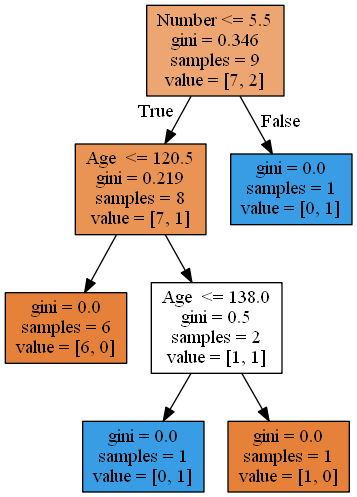

In [43]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True )

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png()) #zeichnet Baum

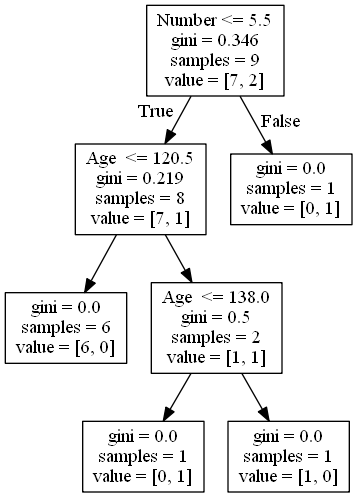

In [42]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=False )

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png()) # Entscheidungsbaum wird gezeichnet



 
 [Export_graphviz:](http://scikit-learn.org/0.16/modules/generated/sklearn.tree.export_graphviz.html)

### Beispiel 2:
Datensatz Bestellung



Wir lesen als erstes den Datensatz 'Bestellung' ein. Hierfür importieren wir wieder zuerst die Bibliotheken, welche wir benötigen. 

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


Wir lesen unseren Datensatz 'Bestellung' ein. Mit 'index_col = ' können Sie einen Index festlegen, indem Sie es hinter 'data/Bestellung.csv' anhängen.

In [5]:
df = pd.read_csv('data/Bestellung.csv')
df

,Fall,Verspaetung,Kunde,Posten,Ruecksendung,Neubestellung
0,1,lang,M,einzel,nein,nein
1,2,lang,M,einzel,nein,nein
2,3,keine,M,einzel,ja,nein
3,4,kurz,F,einzel,nein,ja
4,5,kurz,U,mehrere,nein,ja
5,6,kurz,U,mehrere,ja,nein
6,7,keine,U,mehrere,ja,ja
7,8,lang,F,einzel,nein,nein
8,9,lang,F,mehrere,ja,ja
9,10,kurz,F,mehrere,nein,ja


Nun lassen wir uns die ersten 5 Zeilen des Datensatzes anzeigen.

In [6]:
print(df.head())

   Fall Verspaetung Kunde   Posten Ruecksendung Neubestellung
0     1        lang     M   einzel         nein          nein
1     2        lang     M   einzel         nein          nein
2     3       keine     M   einzel           ja          nein
3     4        kurz     F   einzel         nein            ja
4     5        kurz     U  mehrere         nein            ja


Wir schauen uns wesentlichen Informationen unseres Dataframes an.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
Fall             14 non-null int64
Verspaetung      14 non-null object
Kunde            14 non-null object
Posten           14 non-null object
Ruecksendung     14 non-null object
Neubestellung    14 non-null object
dtypes: int64(1), object(5)
memory usage: 432.0+ bytes


Da die Werte in Verspaetung, Kunde, Posten, Ruecksendung, Neubestellung nicht vom Typ 'integer' sind, müssen wir diese in 'integer' Werte konvertieren.

$Verspaetung:$

    keine: 0
    kurz: 1
    lang: 2

$Kunde:$

    M: 0
    F: 1
    U: 2

$Posten:$

    einzel: 0
    mehrere: 1

$Ruecksendung:$

    nein: 0
    ja: 1

$Neubestellung:$

    nein: 0
    ja: 1

In [8]:
df = df[['Fall', 'Verspaetung', 'Kunde', 'Posten', 'Ruecksendung', 'Neubestellung']]

In [9]:
df['Verspaetung'] = df['Verspaetung'].map({'keine': 0, 'kurz': 1, 'lang': 2 })

In [10]:
df['Kunde'] = df['Kunde'].map({'M': 0, 'F': 1, 'U': 2 })

In [11]:
df['Posten'] = df['Posten'].map({'einzel': 0, 'mehrere': 1})

In [12]:
df['Ruecksendung'] = df['Ruecksendung'].map({'nein': 0, 'ja': 1})

In [13]:
df['Neubestellung'] = df['Neubestellung'].map({'nein': 0, 'ja': 1})

Im Folgenden lassen wir die fehlenden Werte wegfallen.

In [14]:
df = df.dropna() #drop missing values 

In [15]:
X = df.drop('Fall',axis=1)
y = df['Fall']


Wir teilen die Daten auf, in einen Trainings- und einen Testdatensatz.

In [16]:
# hierfür benötigen wir die oben importierte Bibliothek: from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [17]:
# hierfür benötigen wir die oben importierte Bibliothek: from sklearn import tree

model = tree.DecisionTreeClassifier()

Nun schauen wir uns die Model Attribute an.

In [18]:
print(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


Festlegen einiger Attribute wie max_depth, max_leaf_nodes, min_impurity_split und min_samples_leaf 
können uns helfen das Model vor Überanpassung der Traningsdaten schützen.
Zuerst passen wir unser Model an, indem wir die Testdaten benutzen.

In [19]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Dann erzielen wir die vorhergesagte Datenausgabe unseres Testdatensatzes gegen unseren wirklichen Testdatensatz.



In [20]:
y_predict = model.predict(X_test)

# hier benötigen wir die oben eingelesene Bibliothek: from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.0

Wie weisen 'feautures' die erste Spalte zu und geben diese aus.

In [21]:
features = list(df.columns[1:])
features

['Verspaetung', 'Kunde', 'Posten', 'Ruecksendung', 'Neubestellung']

In [22]:
tree.export_graphviz(model, out_file='tree.dot', feature_names=features, max_depth=None)

In [23]:
from subprocess import call

call(['dot', '-T', 'png', 'tree.dot', '-o', 'img/Baum.png'])

0

Der Entscheidungsbaum wird als png-Datei in dem angelegten Ordner img, erstellt. Würden wir keinen Pfad angeben, so würden wir die Datei in dem Ordner erstellen lassen, in welchem unser Jupyter Notebook gespeichert ist.
Im Folgenden lesen wir den Entscheidungsbaum ein. 

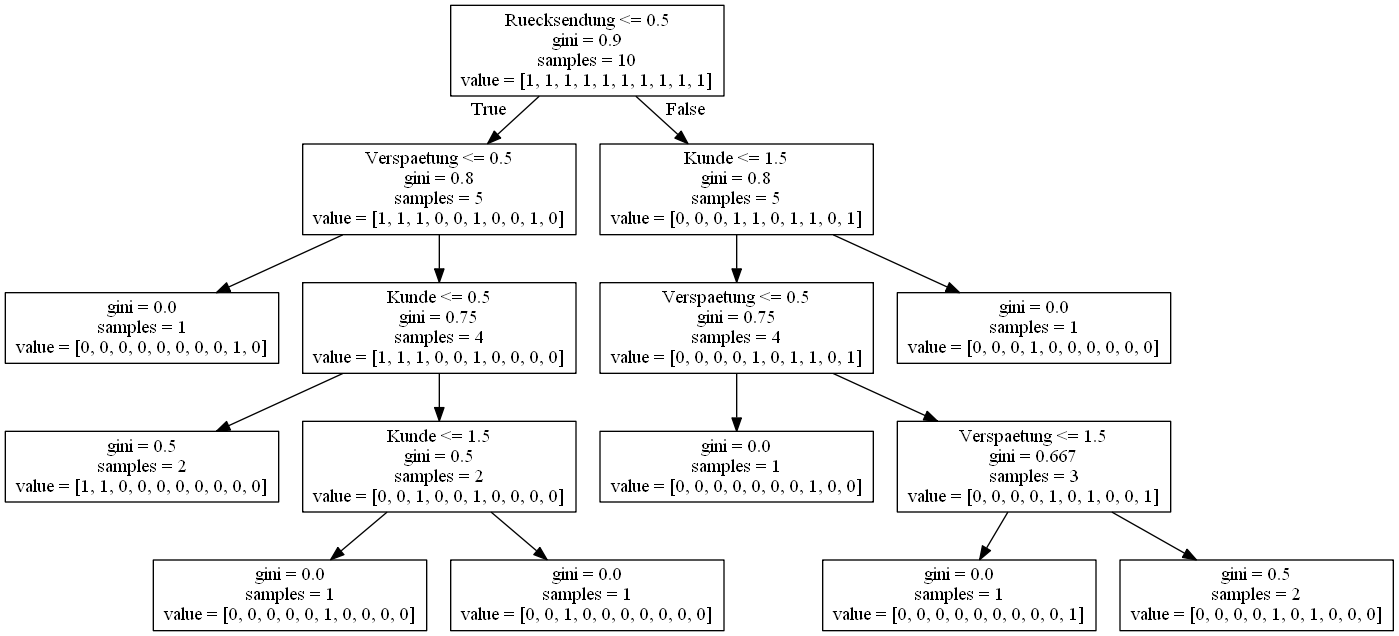

In [24]:
from IPython.display import Image
Image("img/Baum.png")

Die Knoten zur linken Seite sind 'True', und die Knoten zur rechten Seite sind 'False'.

### Beispiel 4:

Der Datensatz [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) ist in Python vorhanden.  

In [69]:

#https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
import sklearn.datasets as datasets
import pandas as pd
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [70]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

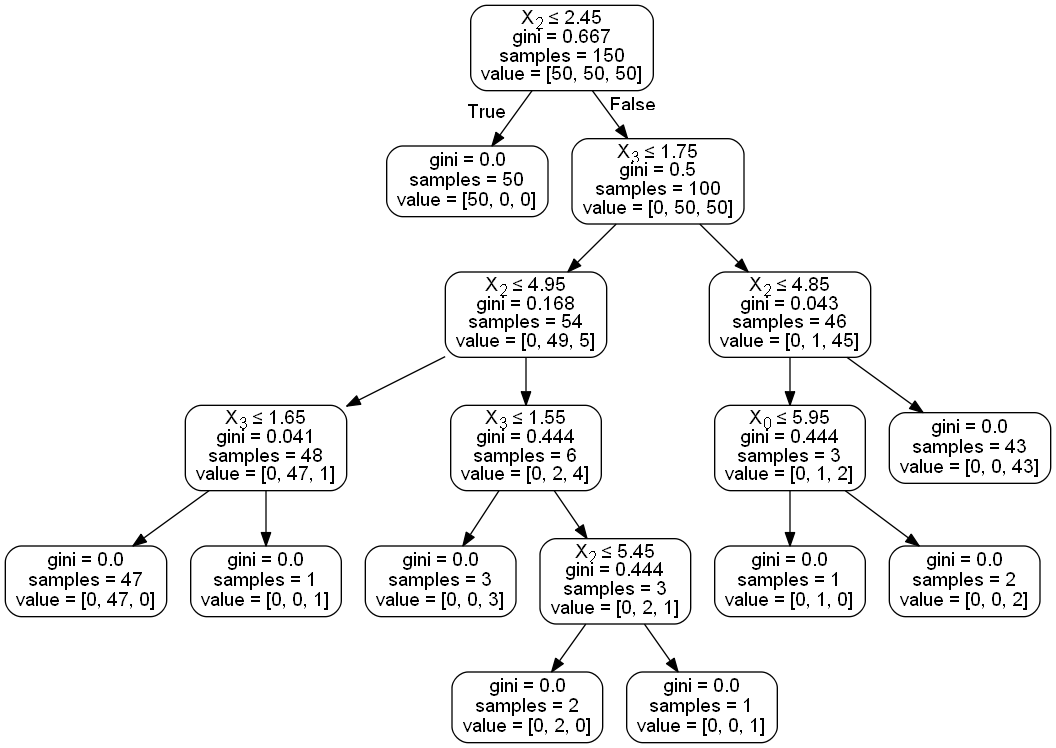

In [76]:
dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=False, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Literatur

### Bücher:

- Witten & Frank: Data Mining: Practical Machine Learning Tools and Techniques, 2015
- Subramanian: Data Science Cookbook, 2005
- Raschka, Sebastian: Python Maschine Learning, 2015
- Williams, Graham: Data Mining with Rattle and R, 2011
- Data Science for Dummies

### Links:
- http://www.ke.tu-darmstadt.de/lehre/archiv/ws0405/mldm/dt.pdf

- https://www.tu-chemnitz.de/informatik/KI/scripts/ss05/DM1-stud-05.pdf

- https://dbs.uni-leipzig.de/file/dw-kap6.pdf

- http://www.informatik.uni-ulm.de/ni/Lehre/SS00/DataMining/talk1.pdf

- http://mars.wiwi.hu-berlin.de/www-data/dat-ss12/SeminararbeitEntscheidungsbaeume.pdf

- https://help.sap.com/doc/saphelp_ewm900/9.0/de-DE/72/e5293b5fdebb1ce10000000a114084/frameset.htm

- https://entwickler.de/online/datenbanken/data-mining-typische-verfahren-und-praxisbeispiele-115010.html

- http://wirtschaftslexikon.gabler.de/Definition/entscheidungsbaum.html

- http://www.wirtschaftslexikon24.com/d/entscheidungsbaum/entscheidungsbaum.htm

- https://technet.microsoft.com/de-de/library/ms175312(v=sql.105).aspx

- http://www.4managers.de/management/themen/data-mining/

- https://www.in.th-nuernberg.de/professors/Holl/Personal/DataMining_Bachelor.pdf

- http://www.informatik.tu-freiberg.de/lehre/pflicht/EinInf/ws07/Informatik07.pdf

- http://scikit-learn.org/stable/modules/tree.html

- https://www.cs.uni-potsdam.de/ml/teaching/ws13/ml/Entscheidungsbaeume1.pdf

- http://www.faes.de/Basis/Basis-Lexikon/Basis-Lexikon-Regressionsbaum/basis-lexikon-regressionsbaum.html#Seitenanfang

- https://de.wikipedia.org/wiki/Klassifizierung

- https://userpages.uni-koblenz.de/~staab/lehre/ws0506/db1/Kapitel19datamining4.pdf

- http://www.grin.com/de/e-book/111117/ansaetze-zur-konstruktion-von-entscheidungsbaeumen

- http://benalexkeen.com/decision-tree-classifier-in-python-using-scikit-learn/

